In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data= pd.read_csv('term-deposit.csv')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


In [3]:
data['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [4]:
data['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [5]:
data['contact'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [6]:
data['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr'], dtype=object)

In [7]:
data.describe()

,age,balance,day,duration,campaign
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,40.544600,1274.277550,16.017225,254.824300,2.882175
std,9.641776,2903.769716,8.278127,259.366498,3.239051
min,19.000000,-8019.000000,1.000000,0.000000,1.000000
25%,33.000000,54.000000,8.000000,100.000000,1.000000
50%,39.000000,407.000000,17.000000,175.000000,2.000000
75%,48.000000,1319.000000,21.000000,313.000000,3.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


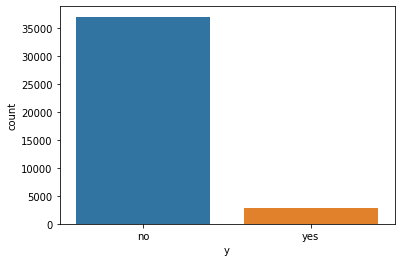

In [9]:
sns.countplot(x='y',data=data)

In [10]:
no = data[data['y']=='no'].count()[0]
no_percentage= no /40000
no_percentage

0.9276

In [11]:
#Looks like an unbalanced dataset.

Text(0.5, 0, 'age')

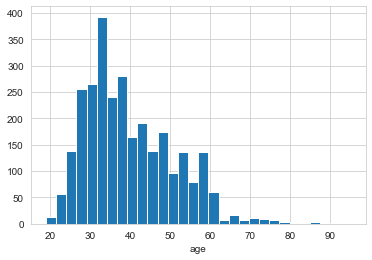

In [12]:
sns.set_style('whitegrid')
data['age'][data['y']=='yes'].hist(bins=30)
plt.xlabel('age')

Text(0.5, 0, 'age')

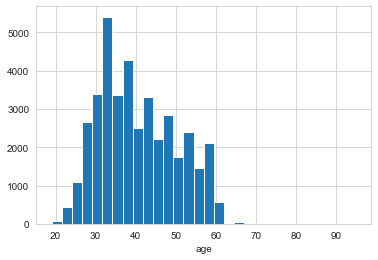

In [13]:
sns.set_style('whitegrid')
data['age'].hist(bins=30)
plt.xlabel('age')

In [14]:
#Looks like the age ratio of people who said yes looks similar. Still between the age of 25 and 60 seems more approachable.

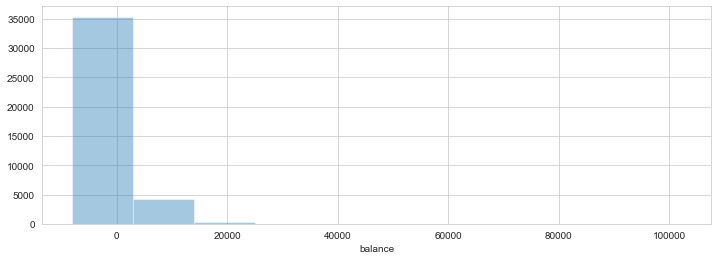

In [15]:
plt.figure(figsize=(12,4))
sns.distplot(data['balance'],kde=False,bins=10)
plt.xlim=(0,20000)

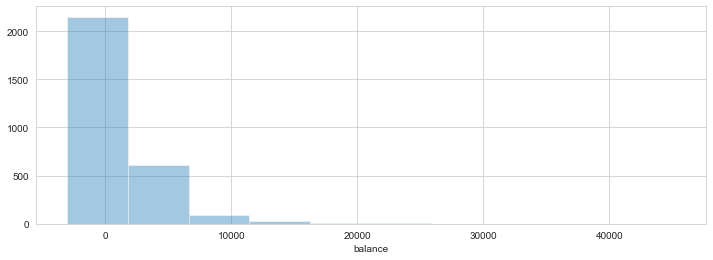

In [16]:
plt.figure(figsize=(12,4))
sns.distplot(data['balance'][data['y']=='yes'],kde=False,bins=10)


In [17]:
#It seems like people who have a balance more than 0 and less than 20000 are more likely to say yes.

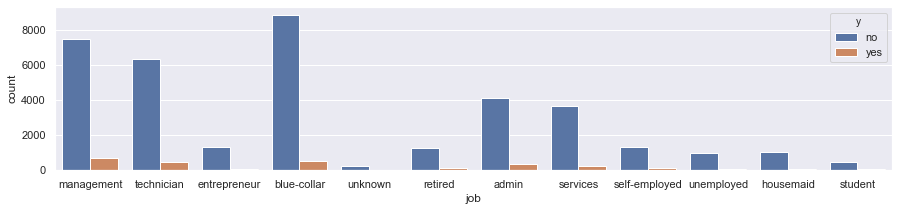

In [18]:
plt.figure(figsize=(15,3))
sns.set(style="darkgrid")
sns.countplot(x="job", data=data, hue='y')

In [19]:
#Management , technician and admins are more likely to accept the term deposit. Blue-collars and service workers must be contacted as well.

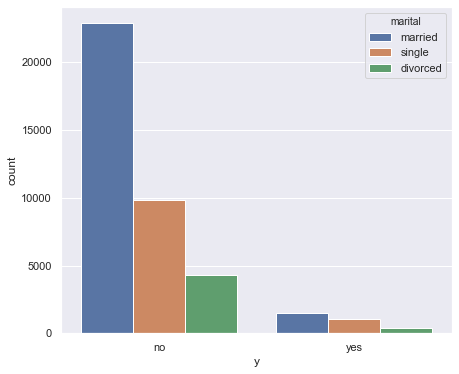

In [20]:
plt.figure(figsize=(7,6))
sns.set(style="darkgrid")
sns.countplot(x="y", data=data, hue='marital')

In [21]:
#Proportionally speeking, single and divorced people are more likely to say yes than married people.

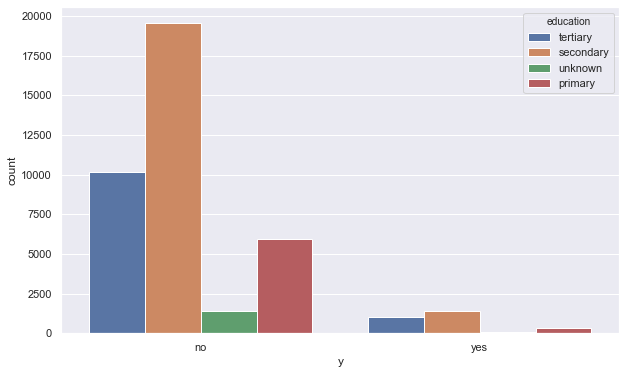

In [22]:
plt.figure(figsize=(10,6))
sns.set(style="darkgrid")
sns.countplot(x="y", data=data, hue='education')

In [23]:
#People who have studied a third degree education are more likely to subscribe to a term deposit than others.

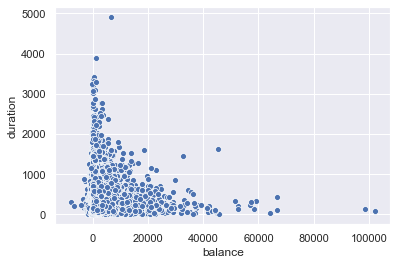

In [24]:
sns.scatterplot(x="balance", y="duration", data=data)

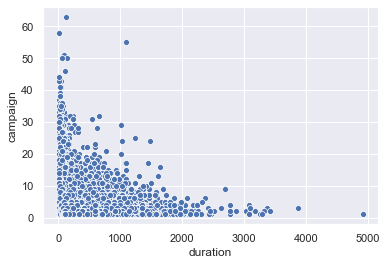

In [25]:
sns.scatterplot(y="campaign", x="duration", data=data)

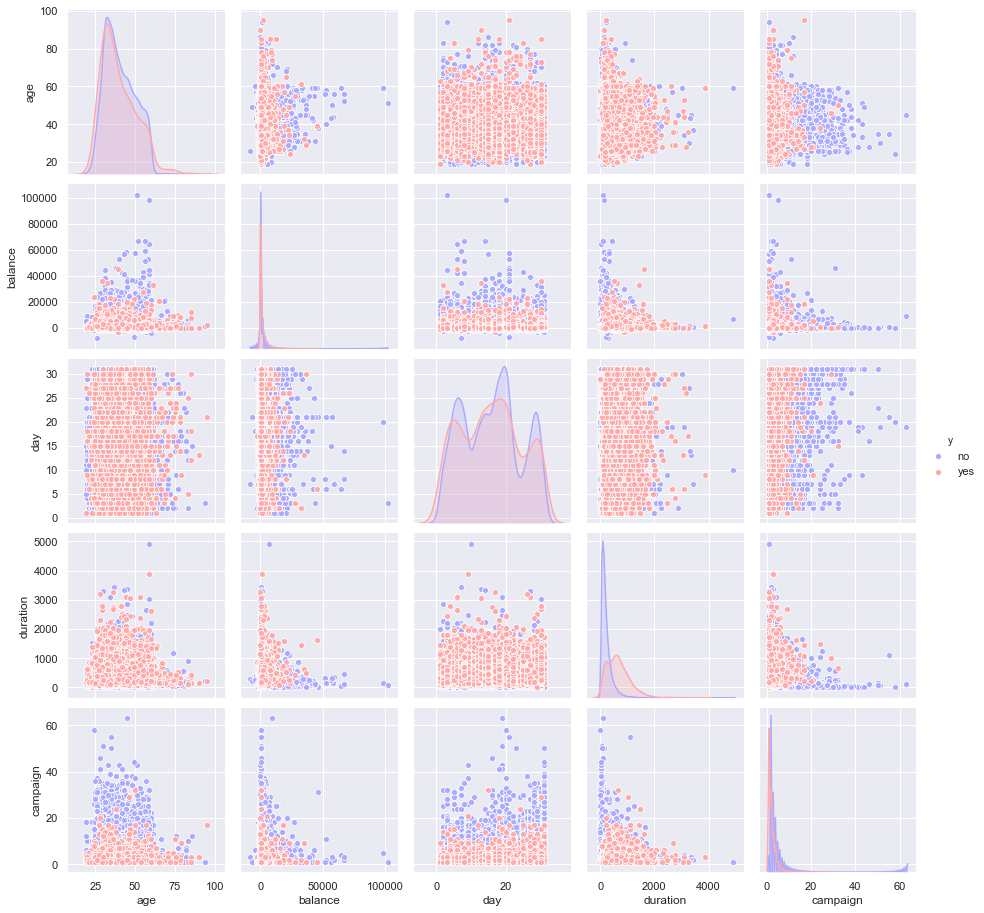

In [26]:
sns.pairplot(data,hue='y',palette='bwr')

In [27]:
data['default'] = data['default'].map({'yes': 1, 'no': 0})
data['housing'] = data['housing'].map({'yes': 1, 'no': 0})
data['loan'] = data['loan'].map({'yes': 1, 'no': 0})
data['y'] = data['y'].map({'yes': 1, 'no': 0})


In [28]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,0


In [29]:
data=data.replace('unknown', np.nan)

In [30]:
data.isnull().sum()

age              0
job            235
marital          0
education     1531
default          0
balance          0
housing          0
loan             0
contact      12765
day              0
month            0
duration         0
campaign         0
y                0
dtype: int64

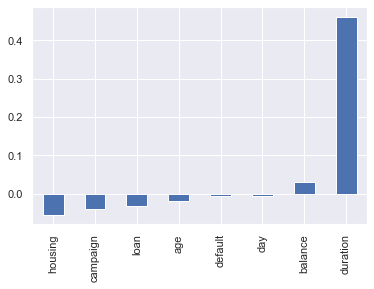

In [31]:
data.corr()['y'].sort_values().drop('y').plot(kind='bar')

In [32]:
#Duration of the last call seems to be the most correlated one with y.

In [33]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,0,2143,1,0,NaN,5,may,261,1,0
1,44,technician,single,secondary,0,29,1,0,NaN,5,may,151,1,0
2,33,entrepreneur,married,secondary,0,2,1,1,NaN,5,may,76,1,0
3,47,blue-collar,married,NaN,0,1506,1,0,NaN,5,may,92,1,0
4,33,NaN,single,NaN,0,1,0,0,NaN,5,may,198,1,0


In [34]:
data= data.dropna(subset=['job'])


In [35]:
data['education'] = data['education'].fillna('n')

In [36]:
dummies = pd.get_dummies(data[['job', 'marital','education','month' ]],drop_first=True)
data = data.drop(['job', 'marital','education','month'],axis=1)
data = pd.concat([data,dummies],axis=1)

In [37]:
data.head()

,age,default,balance,housing,loan,contact,day,duration,campaign,y,...,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct
0,58,0,2143,1,0,NaN,5,261,1,0,...,0,0,0,0,0,0,0,1,0,0
1,44,0,29,1,0,NaN,5,151,1,0,...,0,0,0,0,0,0,0,1,0,0
2,33,0,2,1,1,NaN,5,76,1,0,...,0,0,0,0,0,0,0,1,0,0
3,47,0,1506,1,0,NaN,5,92,1,0,...,0,0,0,0,0,0,0,1,0,0
5,35,0,231,1,0,NaN,5,139,1,0,...,0,0,0,0,0,0,0,1,0,0


In [38]:
from sklearn.neighbors import KNeighborsClassifier

In [39]:
knn = KNeighborsClassifier(n_neighbors=3)

In [40]:
y=data['y']

In [41]:
data_with_null = data.drop('y',axis=1)

In [42]:
data_without_null = data_with_null.dropna()

In [43]:
train_data_x=data_without_null.drop('contact',axis=1)

In [44]:
train_data_y=data_without_null['contact']

In [45]:
knn.fit(train_data_x,train_data_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [46]:
test_data= data_with_null.drop('contact',axis=1)

In [47]:
k = knn.predict(test_data)

In [48]:
contact_predicted=pd.DataFrame(k)

In [49]:
contact_predicted.rename(columns={0: 'contact'},inplace=True)

In [50]:
data_with_null.contact.fillna(contact_predicted.contact,inplace=True)

In [51]:
data=data_with_null

In [52]:
dummies = pd.get_dummies(data['contact'],drop_first=True)

In [53]:
data = data.drop('contact',axis=1)
data = pd.concat([data,dummies],axis=1)

In [54]:
data=pd.concat([data,y],axis=1)

In [55]:
data.head()

,age,default,balance,housing,loan,day,duration,campaign,job_blue-collar,job_entrepreneur,...,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,telephone,y
0,58,0,2143,1,0,5,261,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,44,0,29,1,0,5,151,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,33,0,2,1,1,5,76,1,0,1,...,0,0,0,0,0,1,0,0,0,0
3,47,0,1506,1,0,5,92,1,1,0,...,0,0,0,0,0,1,0,0,0,0
5,35,0,231,1,0,5,139,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39765 entries, 0 to 39999
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  39765 non-null  int64
 1   default              39765 non-null  int64
 2   balance              39765 non-null  int64
 3   housing              39765 non-null  int64
 4   loan                 39765 non-null  int64
 5   day                  39765 non-null  int64
 6   duration             39765 non-null  int64
 7   campaign             39765 non-null  int64
 8   job_blue-collar      39765 non-null  uint8
 9   job_entrepreneur     39765 non-null  uint8
 10  job_housemaid        39765 non-null  uint8
 11  job_management       39765 non-null  uint8
 12  job_retired          39765 non-null  uint8
 13  job_self-employed    39765 non-null  uint8
 14  job_services         39765 non-null  uint8
 15  job_student          39765 non-null  uint8
 16  job_technician       3

In [57]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [59]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [60]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [61]:
from sklearn.model_selection import cross_val_score

In [62]:
from sklearn.neighbors import KNeighborsClassifier
model1 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
model1.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [63]:
y_pred = model1.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[9088  131]
 [ 559  164]]


0.9305974652987327

In [64]:
accuracy = cross_val_score(model1, X_train, y_train, scoring='accuracy', cv = 5)
print(accuracy)
#get the mean of each fold 
print("Accuracy of Model with Cross Validation is:",accuracy.mean() * 100)

[0.93042749 0.92824811 0.92808047 0.9342723  0.93158954]
Accuracy of Model with Cross Validation is: 93.05235829618672


In [65]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
model2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [66]:
y_pred = model2.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[8786  433]
 [ 426  297]]


0.9135988734661034

In [67]:
accuracy = cross_val_score(model2, X_train, y_train, scoring='accuracy', cv = 5)
print(accuracy)
#get the mean of each fold 
print("Accuracy of Model with Cross Validation is:",accuracy.mean() * 100)

[0.91098072 0.9116513  0.90980721 0.91381623 0.91716968]
Accuracy of Model with Cross Validation is: 91.26850288655655


In [68]:
from sklearn.svm import SVC
model3 = SVC(kernel = 'rbf', random_state = 0)
model3.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [69]:
y_pred = model3.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[9135   84]
 [ 591  132]]


0.9321062160531081

In [70]:
accuracy = cross_val_score(model3, X_train, y_train, scoring='accuracy', cv = 5)
print(accuracy)
#get the mean of each fold 
print("Accuracy of Model with Cross Validation is:",accuracy.mean() * 100)

[0.93176865 0.93210394 0.92958927 0.93393696 0.93410463]
Accuracy of Model with Cross Validation is: 93.23006887370606


In [71]:
from sklearn.linear_model import LogisticRegression
model4 = LogisticRegression(random_state = 0)
model4.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [72]:
y_pred = model4.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[9102  117]
 [ 526  197]]


0.9353248843291089

In [73]:
accuracy = cross_val_score(model4, X_train, y_train, scoring='accuracy', cv = 5)
print(accuracy)
#get the mean of each fold 
print("Accuracy of Model with Cross Validation is:",accuracy.mean() * 100)

[0.93294216 0.93260687 0.93109807 0.93594903 0.93460765]
Accuracy of Model with Cross Validation is: 93.34407563008675


In [74]:
from sklearn.ensemble import RandomForestClassifier
model6 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
model6.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [75]:
y_pred = model6.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[9092  127]
 [ 571  152]]


0.9297927982297325

In [76]:
accuracy = cross_val_score(model6, X_train, y_train, scoring='accuracy', cv = 5)
print(accuracy)
#get the mean of each fold 
print("Accuracy of Model with Cross Validation is:",accuracy.mean() * 100)

[0.92908634 0.92942163 0.92975692 0.93309859 0.93293092]
Accuracy of Model with Cross Validation is: 93.08588777706757


In [77]:
from xgboost import XGBClassifier
model7 = XGBClassifier()
model7.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [78]:
y_pred = model7.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[9007  212]
 [ 441  282]]


0.9343190504928586

In [79]:
accuracy = cross_val_score(model7, X_train, y_train, scoring='accuracy', cv = 5)
print(accuracy)
#get the mean of each fold 
print("Accuracy of Model with Cross Validation is:",accuracy.mean() * 100)

[0.93411567 0.93176865 0.93411567 0.93594903 0.93561368]
Accuracy of Model with Cross Validation is: 93.43125419181757


In [80]:
# For the first bonus question, I have tried to find answers during EDA and wrote comments there.

In [81]:
#For the second question, as seen from the correlations, duration of the last call is the key to 
#convince people to subscribe for a term deposit.